### Overview

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

from sklearn.feature_extraction.text import TfidfVectorizer

from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
pip install --upgrade numpy scikit-learn

Requirement already up-to-date: numpy in /Users/pmjustafort/anaconda3/envs/learn-env/lib/python3.8/site-packages (1.24.4)
Requirement already up-to-date: scikit-learn in /Users/pmjustafort/anaconda3/envs/learn-env/lib/python3.8/site-packages (1.3.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install textblob

### Exploratory Data Analysis 

In [4]:
gender_df = pd.read_csv('gender_classifier_dfe.csv')

In [5]:
gender_df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,gender,gender_confidence,profile_yn,profile_yn_confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,2015-10-26T23:24:00,male,1.0000,True,1.0,2013-12-05T01:48:00,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,2015-10-26T12:40:00,658730000000000000,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,2015-10-26T23:30:00,male,1.0000,True,1.0,2012-10-01T13:51:00,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,2015-10-26T12:40:00,658730000000000000,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,2015-10-26T23:33:00,male,0.6625,True,1.0,2014-11-28T11:30:00,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,2015-10-26T12:40:00,658730000000000000,clcncl,Belgrade
3,815719229,False,finalized,3,2015-10-26T23:10:00,male,1.0000,True,1.0,2009-06-11T22:39:00,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,2015-10-26T12:40:00,658730000000000000,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,2015-10-27T01:15:00,female,1.0000,True,1.0,2014-04-16T13:23:00,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,2015-10-26T12:40:00,658730000000000000,NaN,NaN


In [6]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_id                20050 non-null  int64  
 1   golden                 20050 non-null  bool   
 2   unit_state             20050 non-null  object 
 3   trusted_judgments      20050 non-null  int64  
 4   last_judgment_at       20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender_confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  bool   
 8   profile_yn_confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [7]:
gender_df.describe()

,unit_id,trusted_judgments,gender_confidence,profile_yn_confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


#### Data Simplication

Will simplify the dataset by retaining only the relevants columns for Natural Language Processing, which will be the text column which contains the tweet content and the gender column which will be our target variable.

In [8]:
gender = gender_df[['text','gender']]
gender.head()

,text,gender
0,Robbie E Responds To Critics After Win Against...,male
1,���It felt like they were my friends and I was...,male
2,i absolutely adore when louis starts the songs...,male
3,Hi @JordanSpieth - Looking at the url - do you...,male
4,Watching Neighbours on Sky+ catching up with t...,female


#### Distribution of Gender

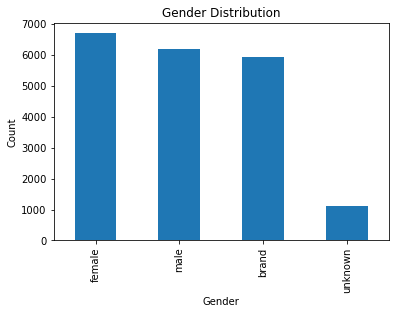

In [9]:
gender['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

In [10]:
gender['gender'].value_counts()

gender
female     6700
male       6194
brand      5942
unknown    1117
Name: count, dtype: int64

Upon an initial exploration, we identified four distinct categories within the gender column:

- Female: 6,700 entries
- Male: 6,194 entries
- Brand: 5,942 entries
- Unknown: 1,117 entries

As our primary objective is to build a model that predicts gender based on the tweet content. With this in mind we will filter our dataset to keep only the two classes (famle and male).

In [11]:
gender_filtered = gender[(gender['gender'] == 'male') | (gender['gender'] == 'female')]

In [12]:
gender_filtered

,text,gender
0,Robbie E Responds To Critics After Win Against...,male
1,���It felt like they were my friends and I was...,male
2,i absolutely adore when louis starts the songs...,male
3,Hi @JordanSpieth - Looking at the url - do you...,male
4,Watching Neighbours on Sky+ catching up with t...,female
...,...,...
20045,"@lookupondeath ...Fine, and I'll drink tea too...",female
20046,Greg Hardy you a good player and all but don't...,male
20047,You can miss people and still never want to se...,male
20048,@bitemyapp i had noticed your tendency to pee ...,female


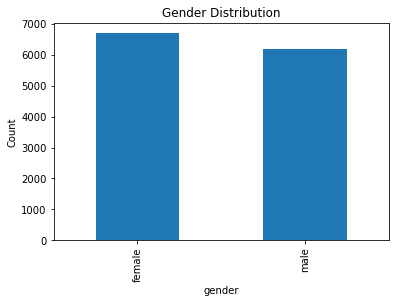

In [13]:
gender_filtered['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.xlabel('gender')
plt.show()

In [14]:
gender_filtered['gender'].value_counts()

gender
female    6700
male      6194
Name: count, dtype: int64

The dataset is fairly balanced between the female and male classes, which is a good starting point for modeling

#### Handling Missing Values

In [15]:
#Checking for missing values
missing_values = gender_filtered.isnull().sum()
missing_values

text      0
gender    0
dtype: int64

- There are no missing values in the columns.


#### Tweet Length Analysis

In [16]:
gender_filtered.loc[:, 'tweet_length'] = gender_filtered['text'].apply(len)

<ipython-input-16-0745e63c2e83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_filtered.loc[:, 'tweet_length'] = gender_filtered['text'].apply(len)


In [17]:
summary_stats = gender_filtered['tweet_length'].describe(percentiles=[.25, .5, .75])
print(summary_stats)

count    12894.000000
mean        96.746006
std         33.790875
min          6.000000
25%         70.000000
50%        100.000000
75%        128.000000
max        425.000000
Name: tweet_length, dtype: float64


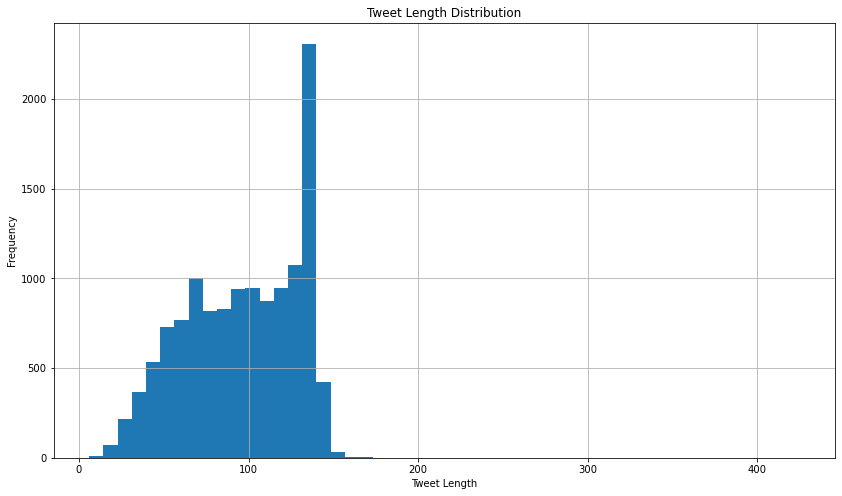

In [18]:
plt.figure(figsize=(14,8))
gender_filtered['tweet_length'].hist(bins=50)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

The histogram showcases the distribution of tweet lengths in the gender_filtered dataset. With a total of 12,894 tweets, the majority cluster around the 100-character mark, as signified by the sharp peak in the visualization. This observation aligns with the median tweet length of 100 characters. However, while most tweets are condensed within this range, there are outliers extending up to a substantial 425 characters, significantly above the mean of approximately 96.75 characters. The presence of such outliers, despite not being prominently visible in the histogram, is crucial to note, as they influence the overall data spread, indicated by a standard deviation of 33.79 characters.

### Text Preprocessing

As we delve into the realm of natural language processing (NLP), it's crucial to acknowledge that raw text data often comes with elements that might not be conducive to direct analysis. Such elements can range from stop words—which are common terms that hold minimal semantic value—to special characters, numbers, or even URLs. Moreover, different forms of the same word can introduce unnecessary redundancy, such as "run", "running", and "ran", which fundamentally share a common meaning. To streamline our dataset and maximize its potential for subsequent analysis, we will embark on a series of text preprocessing measures. In the steps ahead, we will tokenize the text, remove stop words, apply lemmatization, and cleanse any unwanted characters or numbers. Through the upcoming code snippets, we will harness the capabilities of the NLTK library and pandas to achieve these objectives.

In [19]:
gender_filtered = gender_filtered.copy()

In [20]:
# Breaking down the text into individual words or tokens.
gender_filtered['tokenized'] = gender_filtered['text'].apply(word_tokenize)

In [21]:
# Removing commonly occurring words that don't add much meaning to the text.
stop_words = set(stopwords.words('english'))

gender_filtered['tokenized'] = gender_filtered['tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [22]:
# Converting words to their base or root form
lemmatizer = WordNetLemmatizer()
gender_filtered['lemmatized'] = gender_filtered['tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [23]:
# Removing Special Characters and Numbers, 
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove numbers and special characters
    text = re.sub(r'\W+', ' ', text)
    return text

gender_filtered['cleaned'] = gender_filtered['lemmatized'].apply(lambda x: clean_text(' '.join(x)))

### Feature Engineering

TF-IDF Vectorization

In [24]:
# To convert the tweet text into numerical data, we will use the TfidfVectorizer:
vectorizer = TfidfVectorizer(max_features=5000) 
X_tfidf = vectorizer.fit_transform(gender_filtered['text'])

Sentiment Analysis

In [25]:
# To derive sentiment from the tweet text, we will utilize TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

gender_filtered['sentiment'] = gender_filtered['text'].apply(get_sentiment)

### Modeling

#### Logistic Regression
Logistic Regression is a straightforward and efficient tool for binary classification. Its simplicity makes it a popular choice for establishing a performance benchmark. By using it as our baseline model, we set a foundational standard, allowing us to gauge the efficacy of more advanced models later on.

In [26]:
# Splitting the data into training and testing set
X = X_tfidf
y = gender_filtered['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
#Initializing the model
model = LogisticRegression()

#Fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Evaluate the performance of the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.596019643318687

Classification Report:
               precision    recall  f1-score   support

      female       0.61      0.63      0.62      2014
        male       0.58      0.56      0.57      1855

    accuracy                           0.60      3869
   macro avg       0.60      0.59      0.59      3869
weighted avg       0.60      0.60      0.60      3869



The Logistic Regression model delivered an overall accuracy of approximately 59.6%, correctly predicting the gender of the tweet author around 60% of the time. When dissecting the metrics, the precision suggests that the model's predictions for 'female' and 'male' authors are correct 61% and 58% of the time, respectively. On the recall front, it captured 63% of actual female authors and 56% of male authors. The F1-scores, a balance of precision and recall, are 0.62 for females and 0.57 for males. These metrics, while providing a decent start, set the stage for subsequent models to strive for enhancements, especially given that the performance across both classes is reasonably balanced.

#### Naive Bayes

The Naive Bayes classifier is efficient and simple, making it a popular choice for text classification. It handles large numbers of features well, a common scenario with text data. Based on Bayes' theorem, it assumes each feature is independent, and while this might sound oversimplified, it often yields strong results in practice. Given its track record with text data and its computational efficiency, we're exploring the Naive Bayes classifier next.

In [29]:
# Initializing the model
nb_classifier = MultinomialNB()

# Training the model
nb_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = nb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Printing the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6022
              precision    recall  f1-score   support

      female       0.60      0.72      0.65      2014
        male       0.61      0.48      0.54      1855

    accuracy                           0.60      3869
   macro avg       0.60      0.60      0.59      3869
weighted avg       0.60      0.60      0.60      3869



The Naive Bayes model delivered an accuracy of 60.22%, which is marginally better than the baseline Logistic Regression's accuracy. However, when we delve deeper into the classification report, it's evident that while Naive Bayes did relatively well in classifying female tweets with a recall of 72%, its recall for male tweets was notably lower at 48%. This disparity means that the model struggled to accurately identify male tweets, misclassifying about half of them. The F1-scores also underline this performance gap, with 65% for female tweets versus 54% for male tweets. While the accuracy was slightly higher, the model's imbalanced performance makes it less consistent than our baseline. Given this, there's merit in exploring other models to identify a more balanced and robust classifier for this dataset.

#### Random Forest Classifier

Random Forest is an ensemble learning method that works by constructing multiple decision trees during training and outputs the mode of the classes for classification. It's known for its high accuracy, ability to handle large data sets with higher dimensionality, and its ability to determine feature importance.

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluating the Random Forest model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.5892995606099768
              precision    recall  f1-score   support

      female       0.60      0.64      0.62      2014
        male       0.58      0.54      0.56      1855

    accuracy                           0.59      3869
   macro avg       0.59      0.59      0.59      3869
weighted avg       0.59      0.59      0.59      3869



The Random Forest Classifier yielded an accuracy of approximately 58.93%. The precision, recall, and F1-score metrics for both the "female" and "male" classes are relatively balanced, but the overall performance is slightly lower than both the Logistic Regression and Naive Bayes models.

Given these results, the Random Forest Classifier didn't offer a significant improvement for this particular dataset and task. It might be beneficial to explore other models, such as Support Vector Machines (SVM) or Gradient Boosted Trees, to see if they can outperform the baseline. Additionally, considering hyperparameter tuning and feature engineering can also help in enhancing the performance of the models.

#### Support Vector Machines (SVM)

Support Vector Machines (SVM) are supervised machine learning models that can be used for both classification or regression challenges. They perform classification by finding the hyperplane that best divides a dataset into classes.

In [31]:
svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluating the SVM model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.5942103902817265
              precision    recall  f1-score   support

      female       0.61      0.63      0.62      2014
        male       0.58      0.56      0.57      1855

    accuracy                           0.59      3869
   macro avg       0.59      0.59      0.59      3869
weighted avg       0.59      0.59      0.59      3869



The Support Vector Machine (SVM) classifier delivered an accuracy of approximately 59.42%. In terms of precision, recall, and F1-score, its performance is on par with the Logistic Regression and marginally better than the Random Forest Classifier. However, the Naive Bayes still maintains a slight edge over all other models tried so far in terms of accuracy.

Thus, even though SVMs are powerful and versatile, for this particular dataset and problem, the SVM didn't provide a breakthrough in performance. Given the results obtained from the various classifiers, it might be worth investing time in hyperparameter tuning, considering ensemble methods, or delving deeper into feature engineering to potentially boost the model's accuracy.

#### Gradient Boosted Trees

Gradient Boosting is an iterative technique which adjusts the weight of an observation based on the last classification. It improves model outcomes by reducing the bias.

In [32]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Evaluating the Gradient Boosted Trees model
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.5704316360816748
              precision    recall  f1-score   support

      female       0.58      0.61      0.60      2014
        male       0.56      0.52      0.54      1855

    accuracy                           0.57      3869
   macro avg       0.57      0.57      0.57      3869
weighted avg       0.57      0.57      0.57      3869



The Gradient Boosting (GBoost) model produced an accuracy of roughly 57.04%. Surprisingly, this ensemble technique, which typically performs quite well on a range of classification problems, didn't surpass the earlier models in performance. Specifically, its results were lower than the Logistic Regression, Naive Bayes, Random Forest, and SVM.

Gradient Boosting focuses on minimizing errors from previous classifiers by adding new trees iteratively. Although powerful, it might be sensitive to noisy data or overfit if not properly tuned. This underscores the importance of hyperparameter tuning and feature engineering. Given the current standings, Naive Bayes still holds the lead in terms of accuracy, and further exploration and adjustments might be needed to fully harness the potential of models like GBoost.

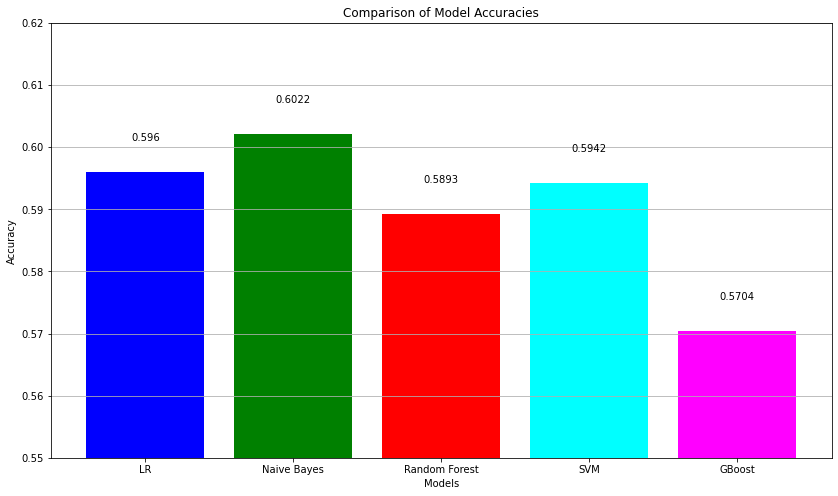

In [33]:
# Data
models = ['LR', 'Naive Bayes', 'Random Forest', 'SVM', 'GBoost']
accuracies = [0.5960, 0.6022, 0.5893, 0.5942, 0.5704]

# Plot
plt.figure(figsize=(14,8))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'cyan', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.55, 0.62)  # set the y-axis limits for better visualization
plt.grid(axis='y')

# Display the accuracy values on top of the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.005, round(accuracies[i], 4), ha='center')

plt.show()